## Static Recognition Model Training & Testing

In [1]:
# ! pip install scikit-learn

In [2]:
import os
from constants import FRAMES_PER_TRAINING, TRAININGS_PER_LABEL, STATIC_LABELS_PATH, KEYPOINTS_PATH
import numpy as np

In [3]:
from files_io import readActionLabels, readActionMapping

static_labels = readActionLabels()
static_labels

['A',
 'B',
 'C',
 'D',
 'E',
 'F',
 'G',
 'H',
 'I',
 'J',
 'K',
 'L',
 'M',
 'N',
 'O',
 'P',
 'Q',
 'R',
 'S',
 'T',
 'U',
 'V',
 'W',
 'X',
 'Y',
 'Z',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 '10']

In [4]:
static_mapping = readActionMapping()
static_mapping

{'A': '0',
 'B': '1',
 'C': '2',
 'D': '3',
 'E': '4',
 'F': '5',
 'G': '6',
 'H': '7',
 'I': '8',
 'J': '9',
 'K': '10',
 'L': '11',
 'M': '12',
 'N': '13',
 'O': '14',
 'P': '15',
 'Q': '16',
 'R': '17',
 'S': '18',
 'T': '19',
 'U': '20',
 'V': '21',
 'W': '22',
 'X': '23',
 'Y': '24',
 'Z': '25',
 '1': '26',
 '2': '27',
 '3': '28',
 '4': '29',
 '5': '30',
 '6': '31',
 '7': '32',
 '8': '33',
 '9': '34',
 '10': '35'}

### 1. Preprocess Data

In [5]:
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical

In [6]:
features, labels = [], []

for static in static_labels:
    sequence = np.load(os.path.join(KEYPOINTS_PATH, f"{static}.npy"))
    # seperate out the features and labels
    for i in range(len(sequence)):
    # for i in range(TRAININGS_PER_LABEL):
        features.append(sequence[i])
        labels.append(static_mapping[static])
      
print(len(features))
print(len(labels))
# print(features)
# print(labels)

10800
10800


In [7]:
X = np.array(features)
X.shape

(10800, 138)

In [8]:
y = to_categorical(labels).astype(int)
y.shape

(10800, 36)

In [9]:
# downscale the data size
X = X.astype(np.float32)

In [10]:
X.nbytes

5961600

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75)

In [12]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(8100, 138)
(2700, 138)
(8100, 36)
(2700, 36)


2. Model Compiling

In [13]:
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, BatchNormalization
from keras.callbacks import TensorBoard

In [14]:
LOG_PATH = os.path.join("log")
tb_callback = TensorBoard(log_dir=LOG_PATH)

In [15]:
modelInputSize = (X.shape[1],1)
modelInputSize

(138, 1)

In [16]:
# Define the CNN model
model = Sequential()

# Convolutional layers
model.add(Conv1D(32, 3, activation='relu', input_shape=modelInputSize))
model.add(MaxPooling1D(2))
model.add(Conv1D(64, 3, activation='relu'))
model.add(MaxPooling1D(2))
model.add(Conv1D(128, 3, activation='relu'))

model.add(Flatten())

# Dense layers for translation (ANN)
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

# Final output layer
model.add(Dense(len(static_labels), activation='softmax'))  # num of output classes

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

# Print the model summary
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 136, 32)           128       
                                                                 
 max_pooling1d (MaxPooling1D  (None, 68, 32)           0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 66, 64)            6208      
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 33, 64)           0         
 1D)                                                             
                                                                 
 conv1d_2 (Conv1D)           (None, 31, 128)           24704     
                                                                 
 flatten (Flatten)           (None, 3968)              0

3. Model Training

In [17]:
model.fit(X_train, y_train, epochs=30)

Epoch 1/30


254/254 [==============================] - 3s 9ms/step - loss: 0.7187 - categorical_accuracy: 0.8140
Epoch 2/30
254/254 [==============================] - 3s 11ms/step - loss: 0.1215 - categorical_accuracy: 0.9690
Epoch 3/30
254/254 [==============================] - 5s 19ms/step - loss: 0.0664 - categorical_accuracy: 0.9823
Epoch 4/30
254/254 [==============================] - 5s 18ms/step - loss: 0.0591 - categorical_accuracy: 0.9863
Epoch 5/30
254/254 [==============================] - 4s 17ms/step - loss: 0.0388 - categorical_accuracy: 0.9906
Epoch 6/30
254/254 [==============================] - 5s 18ms/step - loss: 0.0383 - categorical_accuracy: 0.9885
Epoch 7/30
254/254 [==============================] - 4s 18ms/step - loss: 0.0288 - categorical_accuracy: 0.9919
Epoch 8/30
254/254 [==============================] - 5s 18ms/step - loss: 0.0254 - categorical_accuracy: 0.9930
Epoch 9/30
254/254 [==============================] - 4s 18ms/step - loss: 0.0391 - categorical_accuracy: 0.

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 136, 32)           128       
                                                                 
 max_pooling1d (MaxPooling1D  (None, 68, 32)           0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 66, 64)            6208      
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 33, 64)           0         
 1D)                                                             
                                                                 
 conv1d_2 (Conv1D)           (None, 31, 128)           24704     
                                                                 
 flatten (Flatten)           (None, 3968)              0

4. Model Testing

In [19]:
# import keras
# model = keras.models.load_model("../static_recognition/models/static_model.h5")
test_results = model.predict(X_test)

85/85 [==============================] - 1s 6ms/step


In [20]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [21]:
y_actual = np.argmax(y_test, axis=1)
y_predict = np.argmax(test_results, axis=1)

In [22]:
accuracy_score(y_actual, y_predict)

0.9940740740740741

In [23]:
multilabel_confusion_matrix(y_actual, y_predict)

array([[[2630,    1],
        [   0,   69]],

       [[2618,    0],
        [   0,   82]],

       [[2621,    0],
        [   0,   79]],

       [[2634,    0],
        [   0,   66]],

       [[2624,    2],
        [   0,   74]],

       [[2628,    0],
        [   0,   72]],

       [[2625,    1],
        [   0,   74]],

       [[2624,    0],
        [   0,   76]],

       [[2640,    0],
        [   0,   60]],

       [[2627,    0],
        [   0,   73]],

       [[2631,    0],
        [   1,   68]],

       [[2632,    0],
        [   0,   68]],

       [[2621,    0],
        [   0,   79]],

       [[2623,    0],
        [   2,   75]],

       [[2626,    0],
        [   0,   74]],

       [[2627,    1],
        [   0,   72]],

       [[2614,    0],
        [   1,   85]],

       [[2632,    3],
        [   0,   65]],

       [[2624,    0],
        [   2,   74]],

       [[2618,    0],
        [   2,   80]],

       [[2633,    0],
        [   3,   64]],

       [[2633,    0],
        [   

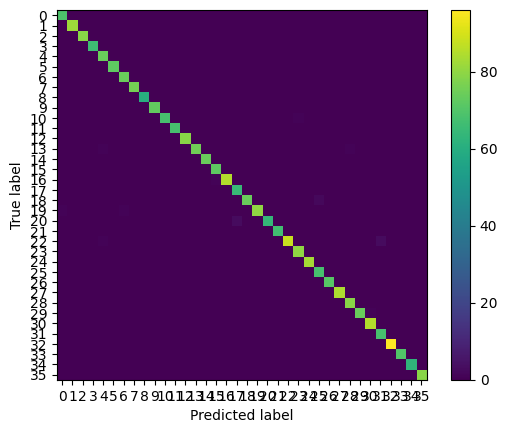

In [24]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline

cm = confusion_matrix(y_actual, y_predict)
cmDisp = ConfusionMatrixDisplay(confusion_matrix=cm)
cmDisp.plot(include_values=False)
plt.show()

5. Saving Model Weights

In [25]:
MODEL_PATH = os.path.join("../static_recognition/models")

In [26]:
# model.save(os.path.join(MODEL_PATH, "static_model.h5"))
# model.save(os.path.join(MODEL_PATH, "static_model_V2.h5"))